<a href="https://colab.research.google.com/github/niladri-rkmvu/dsa-2025/blob/main/algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O(n)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define larger input range
n_values = np.array([1, 10, 100, 1000, 10000])

# Step 2: Growth functions
def constant(n): return np.ones_like(n)
def log_n(n): return np.log2(n)
def sqrt_n(n): return np.sqrt(n)
def linear(n): return n
def n_log_n(n): return n * np.log2(n)
def n_square(n): return n ** 2
def n_square_log_n(n): return n ** 2 * np.log2(n)
def n_cubed(n): return n ** 3
def exp_2_n(n): return np.where(n <= 100, 2 ** n, np.inf)
def exp_3_n(n): return np.where(n <= 50, 3 ** n, np.inf)
def n_pow_n(n): return np.array([ni ** ni if ni <= 10 else np.inf for ni in n])

# Step 3: Compute values
function_map = {
    "Constant": constant,
    "Log n": log_n,
    "√n": sqrt_n,
    "n": linear,
    "n log n": n_log_n,
    "n²": n_square,
    "n² log n": n_square_log_n,
    "n³": n_cubed,
    "2ⁿ": exp_2_n,
    "3ⁿ": exp_3_n,
    "nⁿ": n_pow_n
}
df = pd.DataFrame({name: f(n_values) for name, f in function_map.items()}, index=n_values)
df.index.name = "n"

# Step 4: Format as 10^k
def format_number(x):
    if pd.isna(x) or np.isinf(x):
        return "∞"
    if x == 0:
        return "0"
    try:
        exponent = int(np.floor(np.log10(abs(x))))
        base = round(x / (10 ** exponent), 2)
        return f"{base}×10^{exponent}"
    except:
        return "?"

formatted_df = df.map(format_number)

# Step 5: Print styled table with borders
try:
    from IPython.display import display, HTML
    styled = formatted_df.style.set_table_attributes("border=1 cellpadding=5 cellspacing=0").set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black')]},
        {'selector': 'td', 'props': [('border', '1px solid black')]}
    ])
    display(HTML("<h3>Function Growth Table</h3>"))
    display(styled)
except:
    print("\nFunction Growth Table:\n")
    print(formatted_df.to_string())

# Step 6: Plotting helper
def plot_group(group_funcs, title, filename):
    fig, ax = plt.subplots(figsize=(10, 5))
    for label, func in group_funcs.items():
        y = func(n_values)
        ax.plot(n_values, y, marker='o')
        valid = ~np.isinf(y)
        if np.any(valid):
            x_end = n_values[valid][-1]
            y_end = y[valid][-1]
            if np.isfinite(x_end) and np.isfinite(y_end):
                ax.text(x_end * 1.15, y_end, label, fontsize=8, ha='left', va='center', clip_on=False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("n (log scale)")
    ax.set_ylabel("Function Value (log scale)")
    ax.set_title(title)
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    plt.subplots_adjust(right=0.82)
    plt.savefig(filename)
    print(f"Saved: {filename}")
    plt.close()

# Step 7: Group plots
group1 = {
    "Constant": constant,
    "Log n": log_n,
    "√n": sqrt_n,
    "n": linear,
    "n log n": n_log_n,
    "n²": n_square,
    "n² log n": n_square_log_n
}
plot_group(group1, "Group 1: Logarithmic to Polynomial Growth", "group1_plot.png")

group2 = {
    "n² log n": n_square_log_n,
    "n³": n_cubed,
    "2ⁿ": exp_2_n,
    "3ⁿ": exp_3_n
}
plot_group(group2, "Group 2: Polynomial to Exponential Growth", "group2_plot.png")

,Constant,Log n,√n,n,n log n,n²,n² log n,n³,2ⁿ,3ⁿ,nⁿ
n,,,,,,,,,,,
1,1.0×10^0,0,1.0×10^0,1.0×10^0,0,1.0×10^0,0,1.0×10^0,2.0×10^0,3.0×10^0,1.0×10^0
10,1.0×10^0,3.32×10^0,3.16×10^0,1.0×10^1,3.32×10^1,1.0×10^2,3.32×10^2,1.0×10^3,1.02×10^3,5.9×10^4,1.0×10^10
100,1.0×10^0,6.64×10^0,1.0×10^1,1.0×10^2,6.64×10^2,1.0×10^4,6.64×10^4,1.0×10^6,0,∞,∞
1000,1.0×10^0,9.97×10^0,3.16×10^1,1.0×10^3,9.97×10^3,1.0×10^6,9.97×10^6,1.0×10^9,∞,∞,∞
10000,1.0×10^0,1.33×10^1,1.0×10^2,1.0×10^4,1.33×10^5,1.0×10^8,1.33×10^9,1.0×10^12,∞,∞,∞


Saved: group1_plot.png
Saved: group2_plot.png


#1.Linear Search

In [ ]:
def linear_search(arr, key):
    """
    Performs linear search on the given list.

    Parameters:
    arr (list): The list to search through.
    key (Any): The element to search for.

    Returns:
    int: The index of key in arr if found, else -1.
    """
    for index, value in enumerate(arr):
        if value == key:
            return index
    return -1

# Example usage
data = [13, 7, 22, 9, 5, 30]
key_value = 9

result = linear_search(data, key_value)

if result != -1:
    print(f"Element {key_value} found at index {result}")
else:
    print(f"Element {key_value} not found in the list")

Element 9 found at index 3


#2.Binary Search - Iterative

In [ ]:
def binary_search(arr, key):
    """
    Performs binary search on a sorted list.

    Parameters:
    arr (list): A list sorted in ascending order.
    key (Any): The element to search for.

    Returns:
    int: The index of the key if found, otherwise -1.
    """
    low, high = 0, len(arr) - 1
    counter = 0

    while low <= high:
        mid = (low + high) // 2
        counter += 1
        # Each field gets 10 characters of space, low-aligned
        print(f"low : {low}, high : {high}, mid : {mid}, compare_count : {counter}")
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid + 1
        else:
            high = mid - 1
    # Each field gets 10 characters of space, low-aligned
    # print("Before return")
    # print(f"low : {low}, high : {high}, mid : {mid}")
    return -1

# Example usage
sorted_data = [3,6,8,12,14,17,25,29,31,36,42,47,53,55,62]
key_value = 100

result = binary_search(sorted_data, key_value)

if result != -1:
    print(f"Element {key_value} found at index {result}")
else:
    print(f"Element {key_value} not found in the list")

low : 0, high : 14, mid : 7, compare_count : 1
low : 8, high : 14, mid : 11, compare_count : 2
low : 12, high : 14, mid : 13, compare_count : 3
low : 14, high : 14, mid : 14, compare_count : 4
Element 100 not found in the list


#3.Binary Search - Recursive

In [ ]:
def binary_search(arr, target, low, high):
    if low > high:
        return -1  # Base case: target not found

    mid = (low + high) // 2

    if arr[mid] == target:
        return mid  # Target found
    elif arr[mid] > target:
        return binary_search(arr, target, low, mid - 1)
    else:
        return binary_search(arr, target, mid + 1, high)

# Example usage
arr = [1, 3, 5, 7, 9, 11, 13]
target = 11

result = binary_search(arr, target, 0, len(arr) - 1)

if result != -1:
    print(f"Element found at index {result}")
else:
    print("Element not found")

Element found at index 5


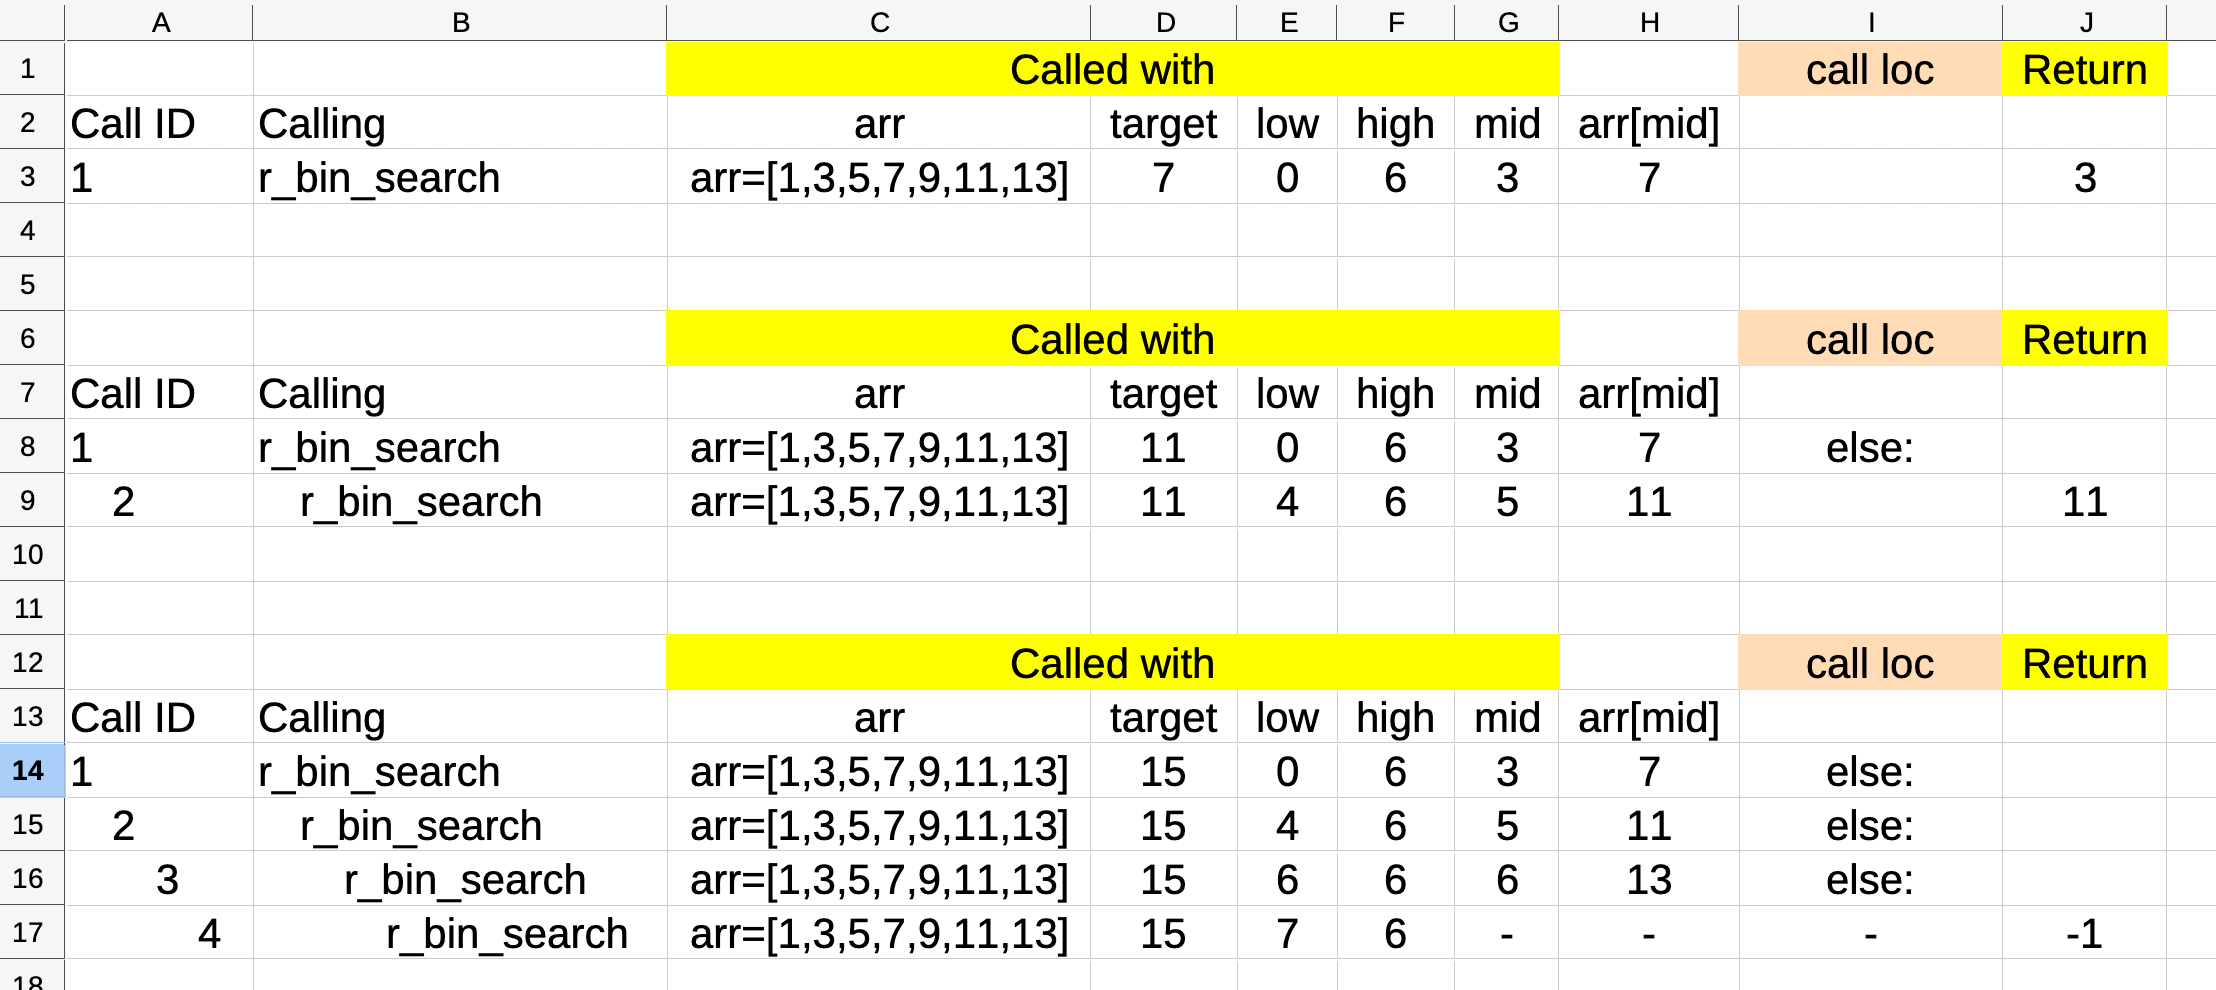